<a href="https://colab.research.google.com/github/fnnrth/2017-JMLR-MCMCForTallData/blob/master/vanillaMH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import numpy.random as npr
import scipy.stats as sps
import scipy.special as spsp
import scipy.misc as spm
import numpy.linalg as npl
import matplotlib.pyplot as plt

In [ ]:
npr.seed(1)
N = 100000
dataType = "Gaussian"
#dataType = "logNormal"
if dataType == "Gaussian":
    x = npr.randn(N)
elif dataType == "logNormal":
    x = npr.lognormal(0,1,size=N)

# We store the mean and std deviation for later reference, they are also the MAP and MLE estimates in this case.
realMean = np.mean(x)
realStd = np.std(x)
print(f"Mean of x = {realMean}")
print(f"Std of x = {realStd}")

Mean of x = 0.005253028489682668
Std of x = 0.9983292735417362


In [ ]:
class MetropolisHastings:
  def run(self):
    pass

  def step(self):
    pass

  def get_LogLhd(self, data, theta):
    return -(data- theta[0])**2/(2*theta[1]**2) - np.log(theta[1])

In [ ]:
class vanillaMH(MetropolisHastings):

    def run(self,data, T,theta):
      N = len(data)
      stepsize = 0.5/np.sqrt(N)

      S = np.zeros((T, 2))
      for i in range(T):
          S[i,:] = self.step(data, theta, stepsize)

      return S

    def step(self,data , theta: np.ndarray, stepsize: int ):

        theta_new = theta + stepsize*npr.default_rng().standard_normal(size=2)
        lhds_old = self.get_LogLhd(data,theta)
        lhds_new = self.get_LogLhd(data,theta_new)
        lhds = np.mean(lhds_new - lhds_old)
        u = np.log(npr.rand())

        if N*lhds > u:
          theta = theta_new

        return theta

[[0.1977552  1.39914588]
 [0.2        1.4       ]
 [0.2        1.4       ]
 ...
 [0.2        1.4       ]
 [0.2011734  1.39925832]
 [0.19854911 1.39769867]]


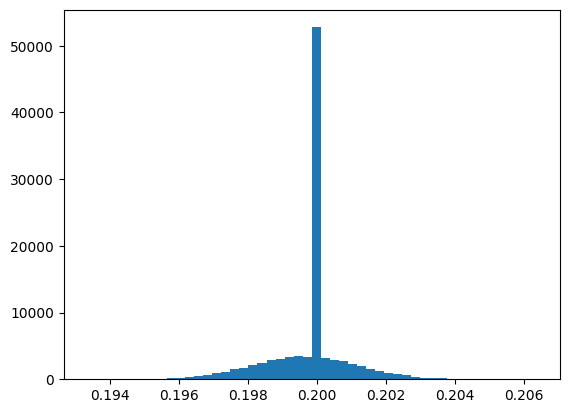

In [ ]:
z = vanillaMH()
theta = np.array([realMean,realStd])
S = z.run(x,100000, np.array([0.2,1.4]))
plt.hist(S[:,0],50)
print(S)